In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('diamonds.csv') # data source: https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond/data

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


A data frame with 53940 rows and 10 variables:

price: price in US dollars

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

In [9]:
df.shape

(53940, 10)

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

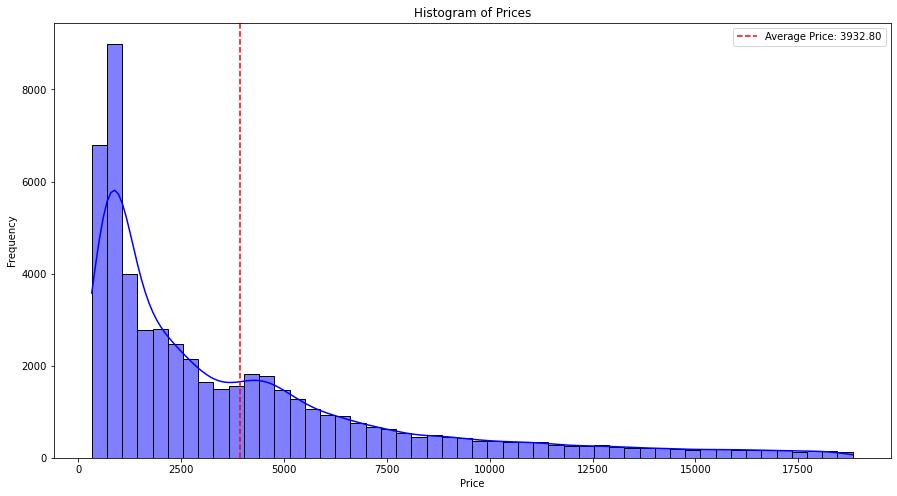

In [16]:
def histogram(df):
    """
    Function to plot a histogram of prices

    Returns a histogram
    """
    plt.figure(figsize=(15, 8))
    sns.histplot(x=df['price'], bins=50, kde=True, color='blue')
    avg_price = df['price'].mean()
    plt.axvline(x=avg_price, color='red', linestyle='--', label=f'Average Price: {avg_price:.2f}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Prices')
    plt.legend()
    plt.show()

histogram(df)

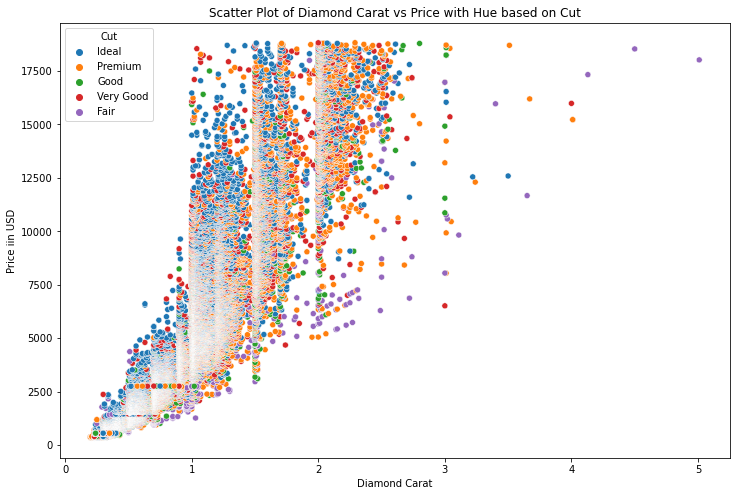

In [23]:
def scatterplot(df):
    """
    Function to plot a scatter plot between carat and price with hue based on the 'cut' variable.

    Returns a scatter plot
    """
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='carat', y='price', hue='cut')
    plt.title('Scatter Plot of Diamond Carat vs Price with Hue based on Cut')
    plt.xlabel('Diamond Carat')
    plt.ylabel('Price iin USD')
    plt.legend(title='Cut')
    plt.show()

scatterplot(df)

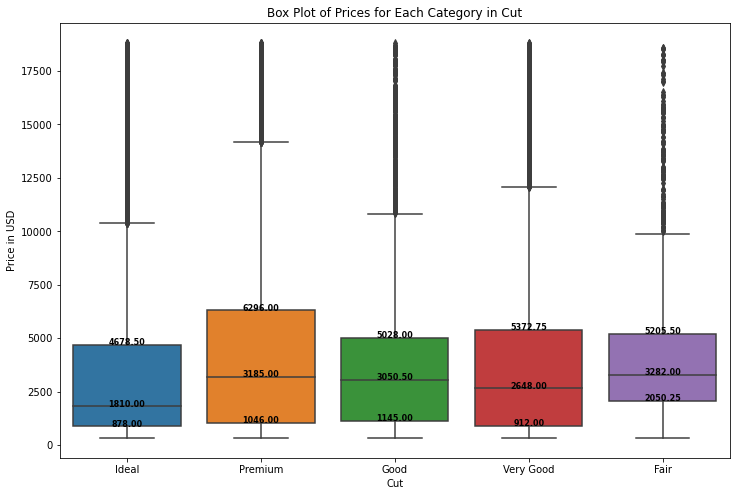

In [30]:
def boxplot(df):
    """
    Function to plot a box plot for prices for each category in the 'cut' column.

    Returns a box plot
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='cut', y='price')

    # Calculate percentiles for price
    percentiles = [25, 50, 75]
    for cut in df['cut'].unique():
        prices = df[df['cut'] == cut]['price']
        for percentile in percentiles:
            price_at_percentile = prices.quantile(percentile / 100)
            plt.text(df['cut'].unique().tolist().index(cut), price_at_percentile, f'{price_at_percentile:.2f}', 
                     horizontalalignment='center', fontsize=8, color='black', weight='semibold')

    plt.title('Box Plot of Prices for Each Category in Cut')
    plt.xlabel('Cut')
    plt.ylabel('Price in USD')
    plt.show()


boxplot(df)

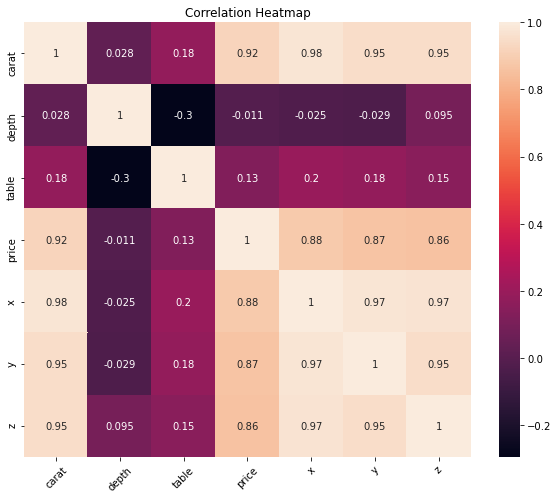

In [29]:
def correlation(df):
    """
    Function to plot a correlation among features.

    Returns a correlation heatmap
    """
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr_matrix, annot=True)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
    plt.title('Correlation Heatmap')
    plt.show()

correlation(df)